In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier 

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
df.shape

(400, 11)

In [5]:
df['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [6]:
for x in df['Sales']:
    if x>10:
        df['Sales'].replace(to_replace = x, value = 'high',inplace=True)
    else:
        df['Sales'].replace(to_replace = x, value = 'low',inplace=True)

In [7]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,low,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,low,139,23,3,37,120,Medium,55,11,No,Yes
397,low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
df.pop('US')

0      Yes
1      Yes
2      Yes
3      Yes
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: US, Length: 400, dtype: object

In [9]:
df=pd.get_dummies(df,columns=['ShelveLoc','Urban'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,low,138,73,11,276,120,42,17,0,0,1
1,high,111,48,16,260,83,65,10,1,0,1
2,high,113,35,10,269,80,59,12,0,1,1
3,low,117,100,4,466,97,55,14,0,1,1
4,low,141,64,3,340,128,38,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,33,14,1,0,1
396,low,139,23,3,37,120,55,11,0,1,0
397,low,162,26,12,368,159,40,18,0,1,1
398,low,100,79,7,284,95,50,12,0,0,1


In [10]:
label_encoder = preprocessing.LabelEncoder()
df['Sales']= label_encoder.fit_transform(df['Sales'])

In [11]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,1,138,73,11,276,120,42,17,0,0,1
1,0,111,48,16,260,83,65,10,1,0,1
2,0,113,35,10,269,80,59,12,0,1,1
3,1,117,100,4,466,97,55,14,0,1,1
4,1,141,64,3,340,128,38,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,33,14,1,0,1
396,1,139,23,3,37,120,55,11,0,1,0
397,1,162,26,12,368,159,40,18,0,1,1
398,1,100,79,7,284,95,50,12,0,0,1


In [12]:
x=df.iloc[:,1:9]
y=df['Sales']

In [13]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good
0,138,73,11,276,120,42,17,0
1,111,48,16,260,83,65,10,1
2,113,35,10,269,80,59,12,0
3,117,100,4,466,97,55,14,0
4,141,64,3,340,128,38,13,0
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1
396,139,23,3,37,120,55,11,0
397,162,26,12,368,159,40,18,0
398,100,79,7,284,95,50,12,0


In [14]:
y

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int32

In [15]:
df['Sales'].unique()

array([1, 0])

In [16]:
df.Sales.value_counts()

1    322
0     78
Name: Sales, dtype: int64

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [18]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False)
model.fit(x_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurit

RandomForestClassifier(min_impurity_split=1e-07, n_estimators=10, n_jobs=1)

In [19]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False)
model.fit(x_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurit

RandomForestClassifier(min_impurity_split=1e-07, n_estimators=10, n_jobs=1)

In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7045454545454546

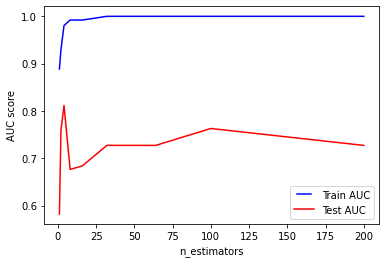

In [22]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [23]:
#Accuracy
np.mean(y_pred==y_test)

0.875